In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset

In [2]:
wind = pd.read_csv('REAL_TIME_wind.csv')

In [3]:
array = np.arange(1,97)
print(array)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]


In [4]:
def dayData(data, bus, freq, x, save):
    ##visualizes the x first days  and the x last days for the data frame data, bus bus, and of frequency of data collection freq.
    period  = data.Period*freq 
    dates = pd.PeriodIndex(year=data.Year, month = data.Month,day = data.Day, minute = period, freq = "T")
    
    data['Date'] = dates
    new_data  = data.groupby('Date').sum()
    #new_data = new_data.rolling(3).mean().loc[new_data.index.minute.isin([0, 15, 30, 45])]
        
    
    
     
    
    
    return new_data

In [5]:
new_pv = dayData(wind, '309_WIND_1',5, 24000, False)
new_pv = new_pv.rolling(3).mean().loc[new_pv.index.minute.isin([0, 15, 30, 45])]

##daily periods
array = np.arange(1.0,97.0)
array2 = np.arange(1.0,97.0)
for i in range(365):
    array = np.append(array,array2)

frame2 = pd.DataFrame({'Period':array})
frame2['Date'] =  new_pv.index
frame2 = frame2.set_index('Date')
print(frame2)
new_pv['Period'] = frame2['Period']


#day number 

array = np.repeat(1,96)

for i in range(365):
    array2 = np.repeat(i+2, 96)
    array = np.append(array,array2)

print(len(array))

frame2 = pd.DataFrame({'#Day':array})
frame2['Date'] =  new_pv.index
frame2 = frame2.set_index('Date')
new_pv['#Day'] = frame2['#Day']
print(new_pv)

                  Period
Date                    
2020-01-01 00:15     1.0
2020-01-01 00:30     2.0
2020-01-01 00:45     3.0
2020-01-01 01:00     4.0
2020-01-01 01:15     5.0
...                  ...
2020-12-31 23:00    92.0
2020-12-31 23:15    93.0
2020-12-31 23:30    94.0
2020-12-31 23:45    95.0
2021-01-01 00:00    96.0

[35136 rows x 1 columns]
35136
                    Year  Month   Day  Period  309_WIND_1  317_WIND_1  \
Date                                                                    
2020-01-01 00:15  2020.0    1.0   1.0     1.0  144.700000  785.433333   
2020-01-01 00:30  2020.0    1.0   1.0     2.0  144.566667  784.466667   
2020-01-01 00:45  2020.0    1.0   1.0     3.0  145.900000  781.033333   
2020-01-01 01:00  2020.0    1.0   1.0     4.0  145.366667  772.300000   
2020-01-01 01:15  2020.0    1.0   1.0     5.0  144.400000  775.333333   
...                  ...    ...   ...     ...         ...         ...   
2020-12-31 23:00  2020.0   12.0  31.0    92.0    1.066667  

In [6]:
##create palette based on month
colors = ['#b32e2e', '#fcba03', '#6fc924', '#054705', '#1dd1b3', '#1d77d1', '#24135e', '#b72fed', 
          '#510370', '#d117be', '#f59aec', '#fa6b75']
result = []

months = 1
for col in colors:
    for i in range(len(new_pv[new_pv.index.month == months]['#Day'].unique())):
        result.append(col)
    months+=1
    
palette = sns.color_palette(result)
    


C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2070807098.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv['Period'], y=new_pv['309_WIND_1'], hue=new_pv['#Day'],ci=None,palette = palette)
C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2070807098.py:9: UserWarning: The palette list has more values (378) than needed (366), which may not be intended.
  sns.lineplot(x=new_pv['Period'], y=new_pv['309_WIND_1'], hue=new_pv['#Day'],ci=None,palette = palette)


Text(0, 0.5, 'Wind Turbine generation')

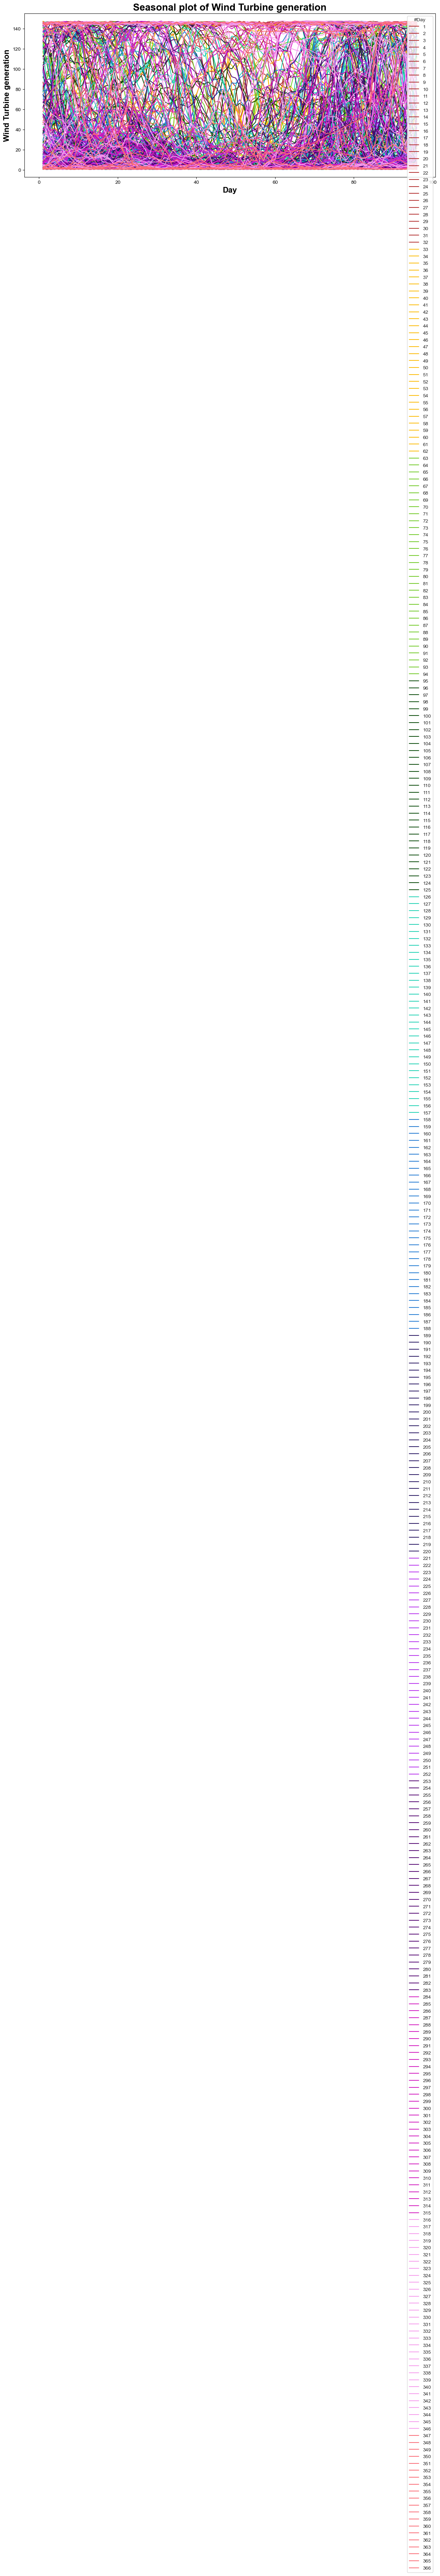

In [7]:

fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv['Period'], y=new_pv['309_WIND_1'], hue=new_pv['#Day'],ci=None,palette = palette)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))


#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#sns.boxplot(d['year'], d[variable], ax=ax[0])
#ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
#ax[0].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

#sns.boxplot(d['month'], d[variable], ax=ax[1])
#ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
#ax[1].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\1455413698.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 1 ]['Period'], y=new_pv[new_pv.index.month == 1 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 1 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

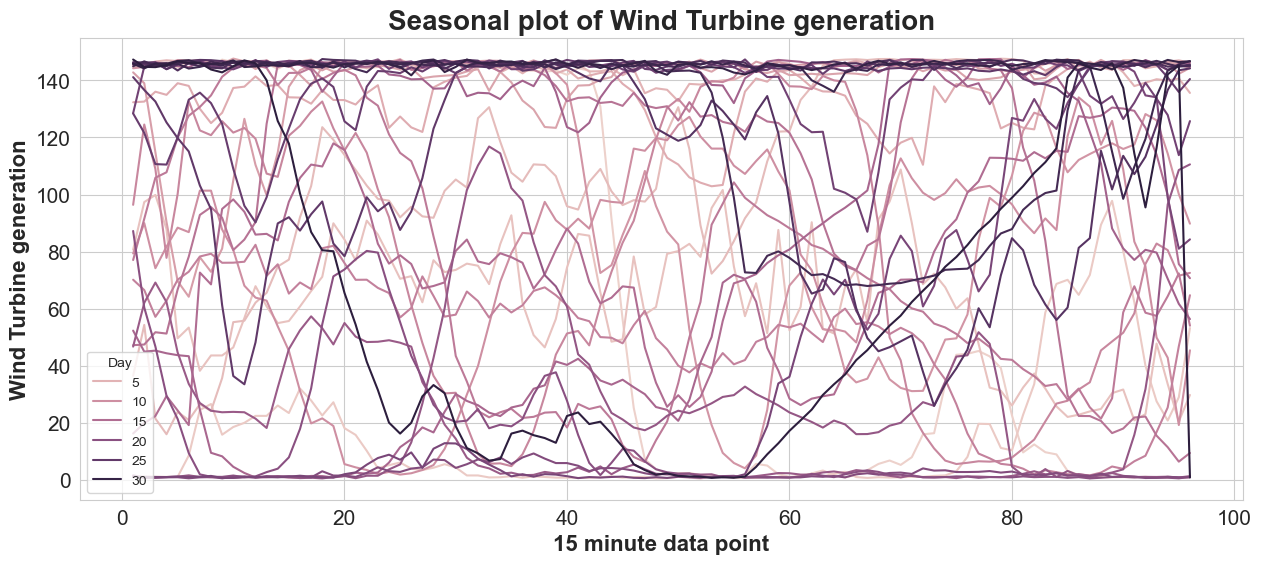

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 1 ]['Period'], y=new_pv[new_pv.index.month == 1 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 1 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\1455413698.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 1 ]['Period'], y=new_pv[new_pv.index.month == 1 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 1 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

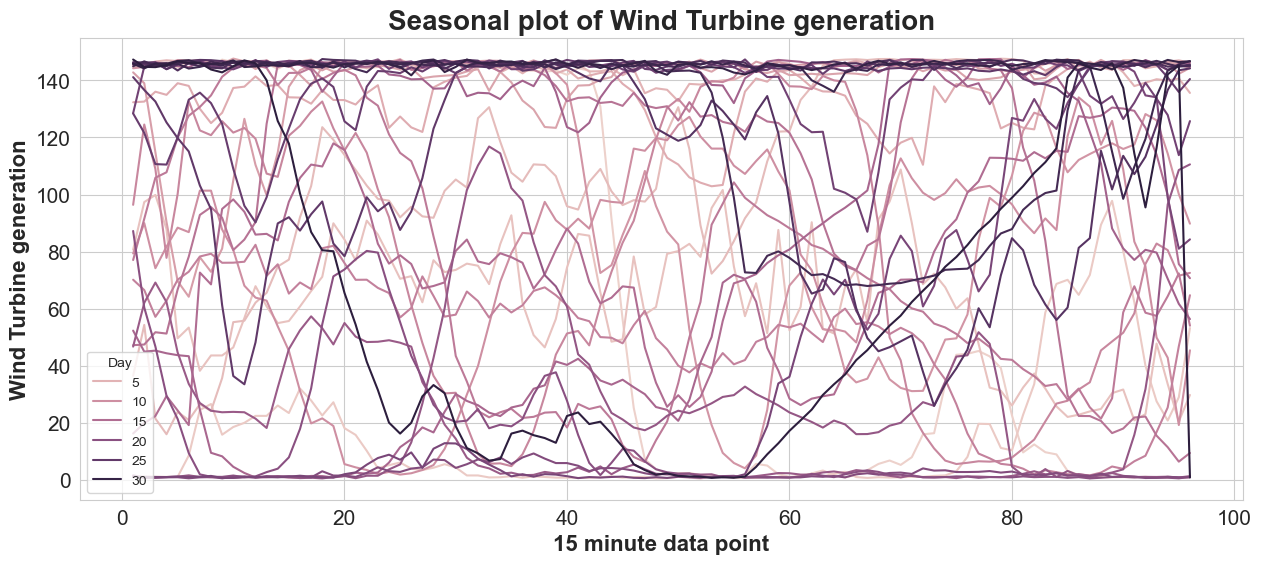

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 1 ]['Period'], y=new_pv[new_pv.index.month == 1 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 1 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2884561312.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 3 ]['Period'], y=new_pv[new_pv.index.month == 3 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 3 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

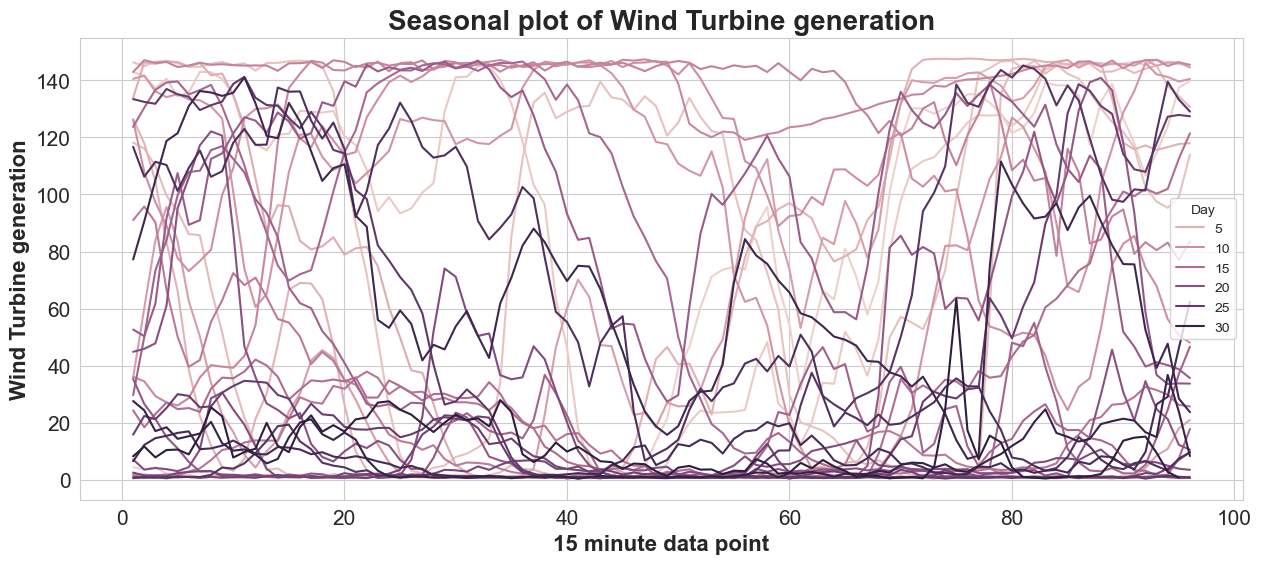

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 3 ]['Period'], y=new_pv[new_pv.index.month == 3 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 3 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2557546167.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 4 ]['Period'], y=new_pv[new_pv.index.month == 4 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 4 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

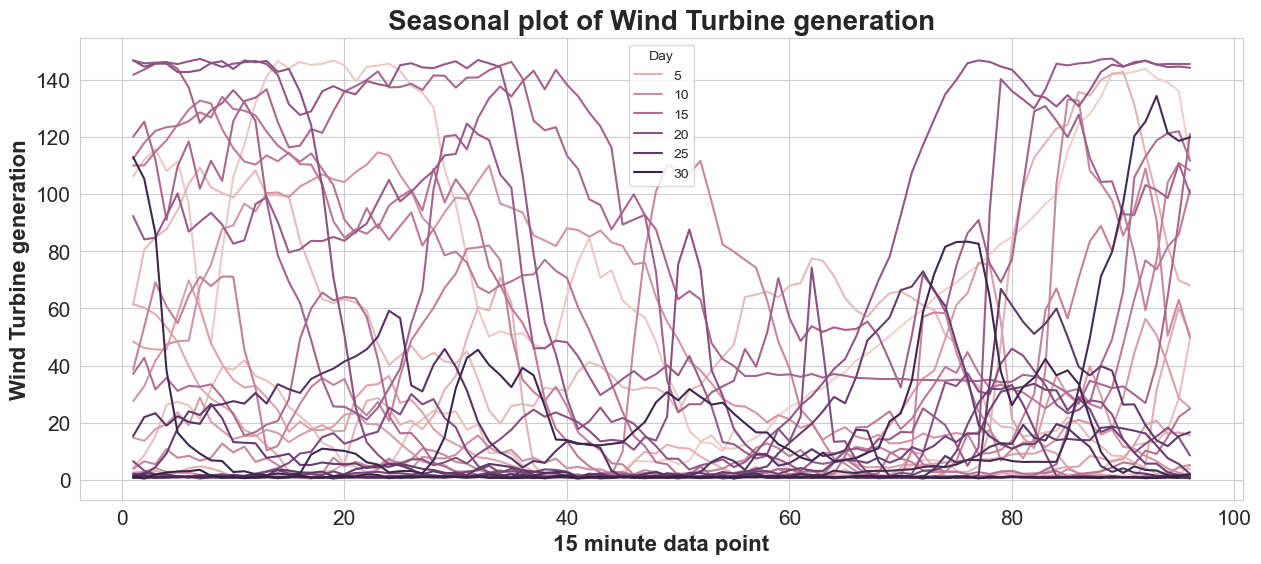

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 4 ]['Period'], y=new_pv[new_pv.index.month == 4 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 4 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\487144990.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 5 ]['Period'], y=new_pv[new_pv.index.month == 5 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 5 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

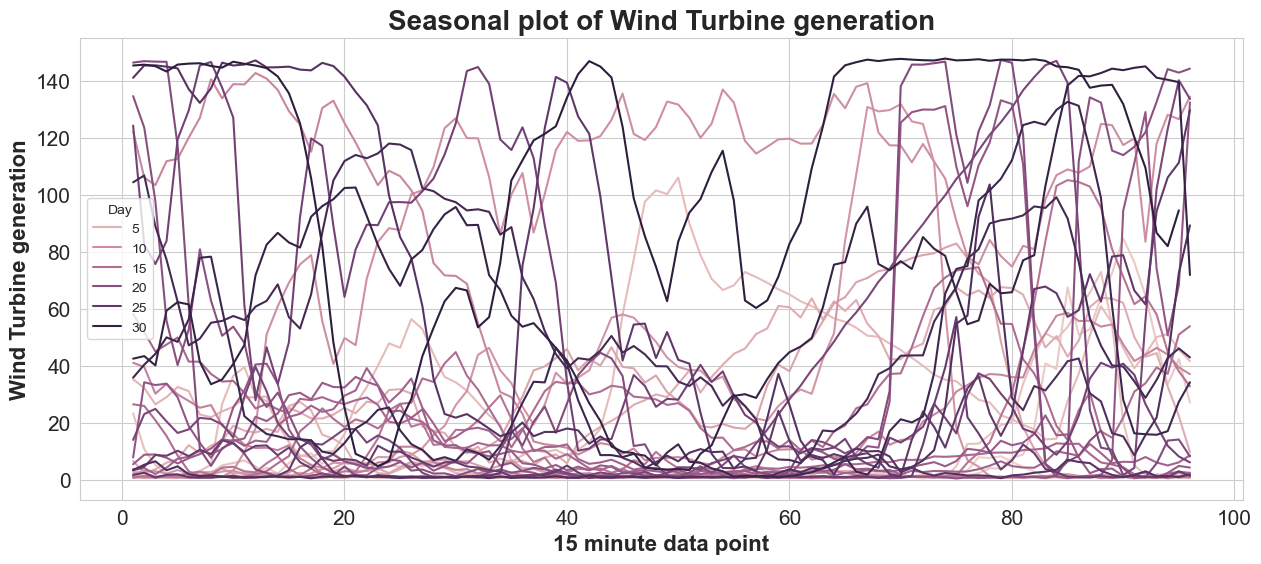

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 5 ]['Period'], y=new_pv[new_pv.index.month == 5 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 5 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2173955075.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 6 ]['Period'], y=new_pv[new_pv.index.month == 6 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 6 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

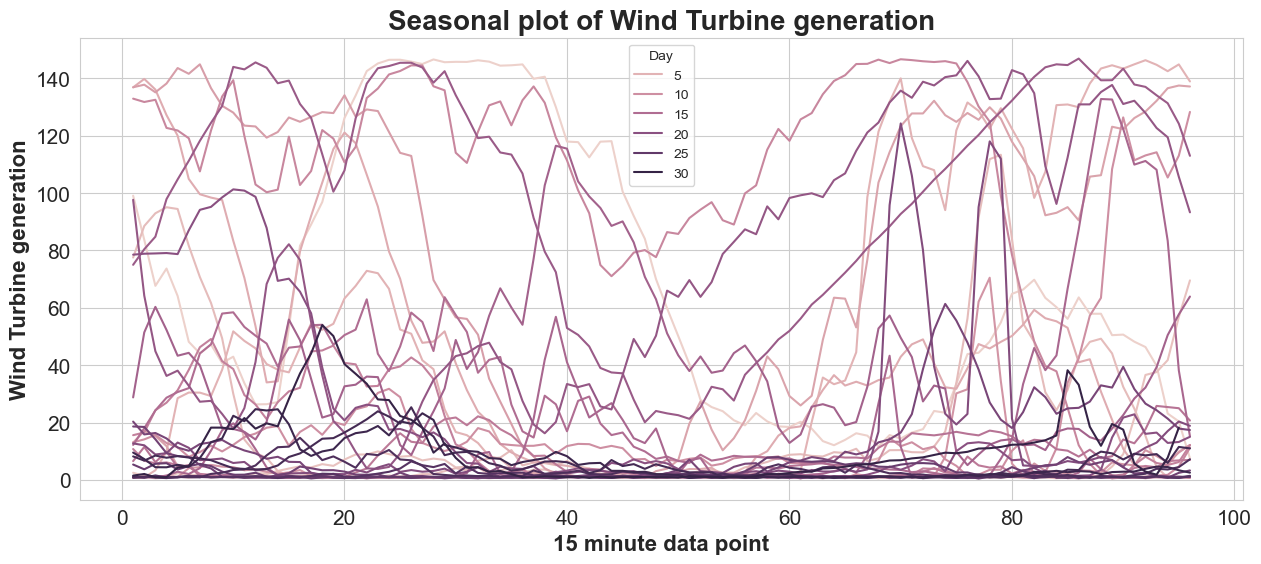

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 6 ]['Period'], y=new_pv[new_pv.index.month == 6 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 6 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2613165281.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 7 ]['Period'], y=new_pv[new_pv.index.month == 7 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 7 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

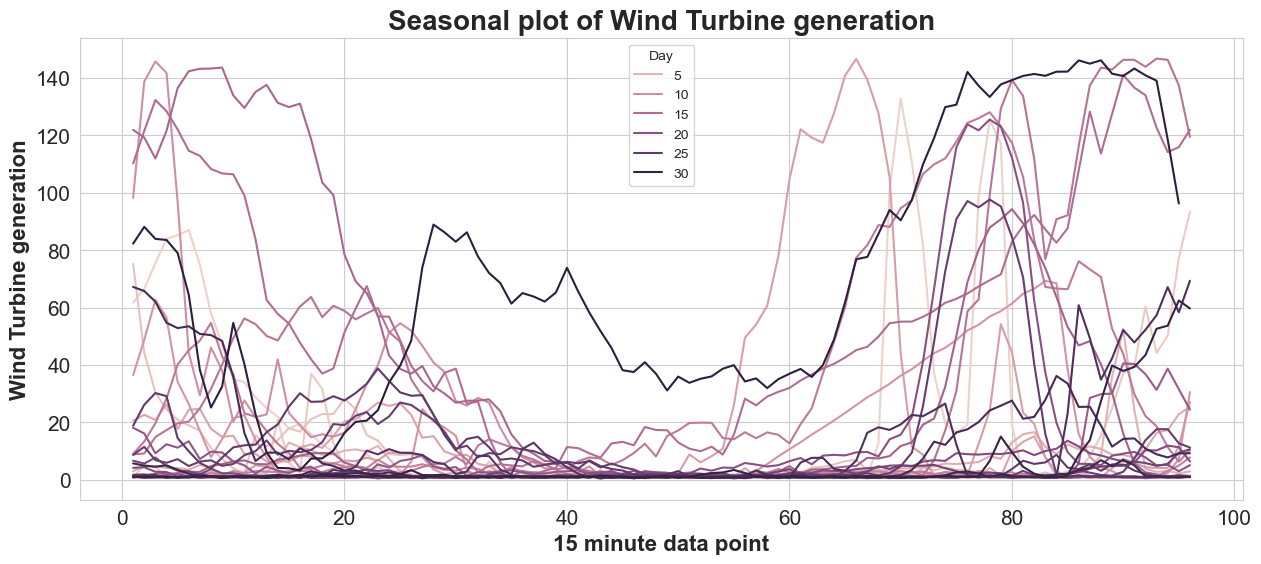

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 7 ]['Period'], y=new_pv[new_pv.index.month == 7 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 7 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\792716919.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 8 ]['Period'], y=new_pv[new_pv.index.month == 8 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 8 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

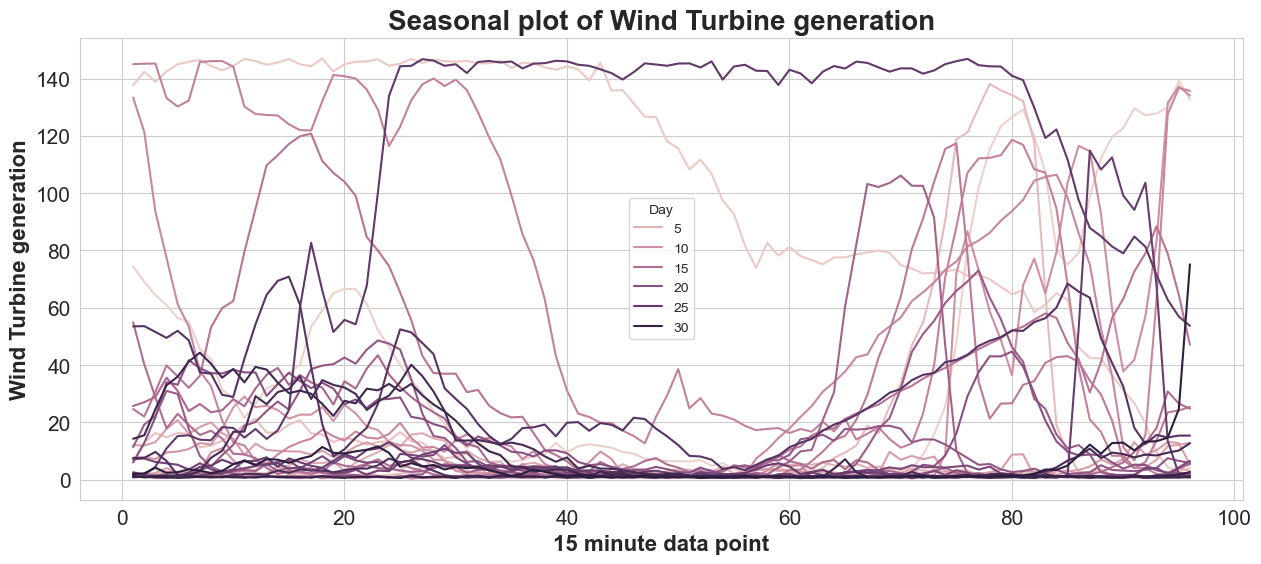

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 8 ]['Period'], y=new_pv[new_pv.index.month == 8 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 8 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\2680224051.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 9 ]['Period'], y=new_pv[new_pv.index.month == 9 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 9 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

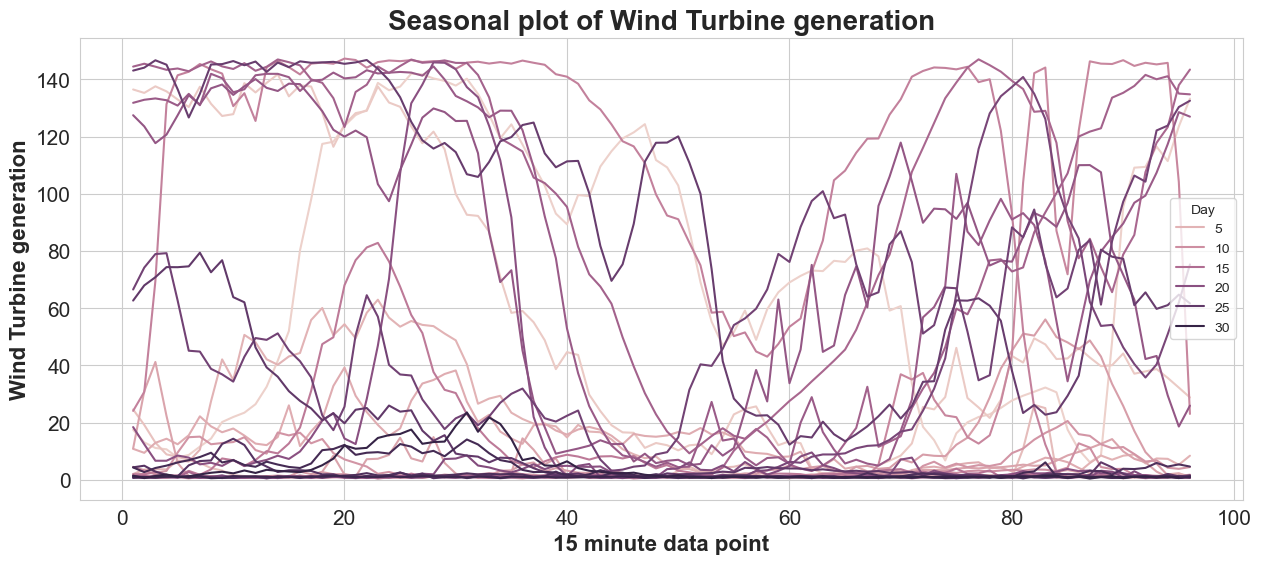

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 9 ]['Period'], y=new_pv[new_pv.index.month == 9 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 9 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\1191867982.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 10 ]['Period'], y=new_pv[new_pv.index.month == 10 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 10 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

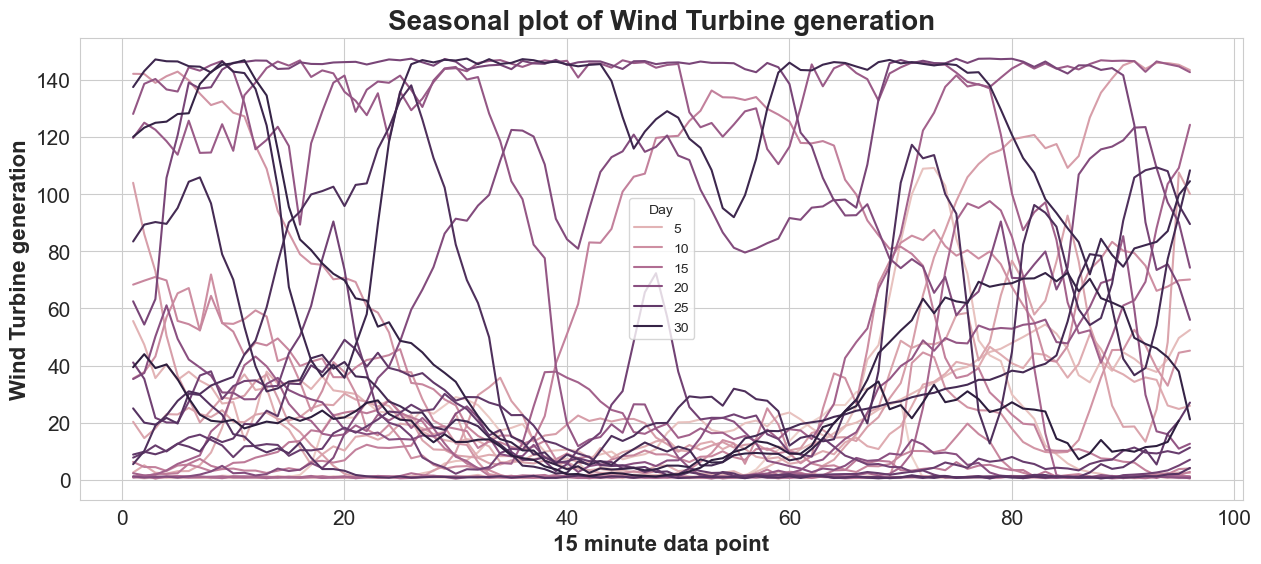

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 10 ]['Period'], y=new_pv[new_pv.index.month == 10 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 10 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\4138797434.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 11 ]['Period'], y=new_pv[new_pv.index.month == 11]['309_WIND_1'], hue=new_pv[new_pv.index.month == 11 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

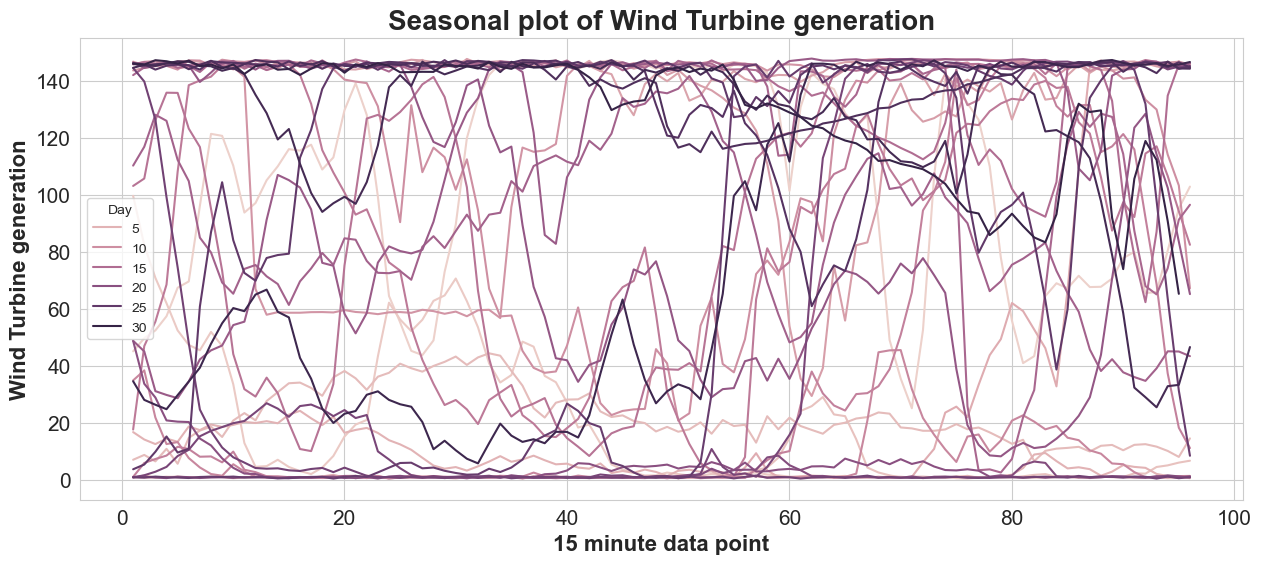

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 11 ]['Period'], y=new_pv[new_pv.index.month == 11]['309_WIND_1'], hue=new_pv[new_pv.index.month == 11 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_22784\985402382.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 12 ]['Period'], y=new_pv[new_pv.index.month == 12 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 12 ]['Day'],ci=None)


Text(0, 0.5, 'Wind Turbine generation')

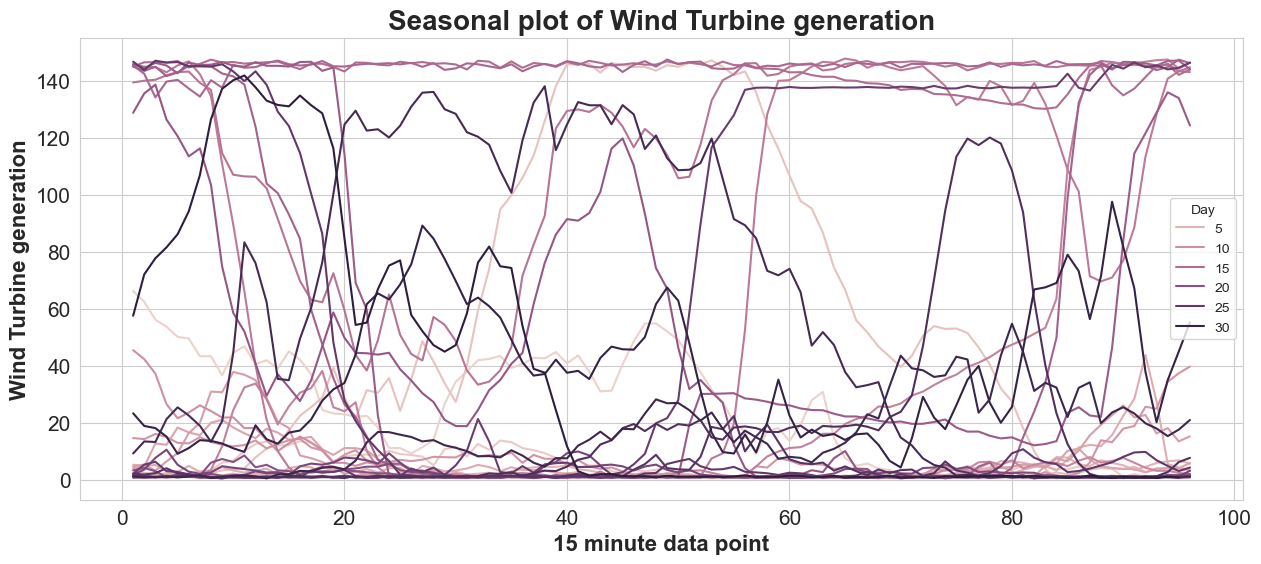

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 12 ]['Period'], y=new_pv[new_pv.index.month == 12 ]['309_WIND_1'], hue=new_pv[new_pv.index.month == 12 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Wind Turbine generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('15 minute data point', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Wind Turbine generation', fontsize = 16, fontdict=dict(weight='bold'))